# Introduction to Probabilisitic Methods

**Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

In this initial lecture, we review core concepts of probability theory through examples relevant to quantitative methods in finance.

Let us begin with an objective to value a simple dice game from the point of view of a rational investor.

Simple Dice Game:
- A fair six sided dice is to be rolled once. The player receives a payment in the amount of the number rolled.

Objective:
- How much money would an investor be willing to pay in order to play this game?

Answer:
- Solve for the expected value of the roll of a single die.

### Mathematical Solution

There is a simple mathematical solution to the objective by computing the expected outcome. Each role has an equal chance of $1/6$ to be rolled and the expected value of any given role is then

$$\frac{1}{6}*1 + \frac{1}{6}*2 + \frac{1}{6}*3 + \frac{1}{6}*4 + \frac{1}{6}*5 + \frac{1}{6}*6 = 3.5.$$

### Probabilistic Solution

Approaching our objective from a probabilistic point of view, we simulate the outcomes of playing the game many times and see what happens on average.

In [6]:
import numpy as np

#Run dice throwing simulation with 100 rolls of the dice.
N = 100

game_outcomes = np.random.randint(low = 1, high = 7, size = N) # Create an array of random integers simulating dice rolls

average_outcome = np.mean(game_outcomes)

print(f"The average value of a dice roll after {N} rolls is {average_outcome}.")

The average value of a dice roll after 100 rolls is 3.71.


In [7]:
# Copy and paste the above code and run simulation a second time.

import numpy as np

#Run dice throwing simulation with 100 rolls of the dice.
N = 100

game_outcomes = np.random.randint(low = 1, high = 7, size = N) # Create an array of random integers simulating dice rolls

average_outcome = np.mean(game_outcomes)

print(f"The average value of a dice roll after {N} rolls is {average_outcome}.")

The average value of a dice roll after 100 rolls is 3.24.


### Observation

The average values of the two simulation of rolling a dice 100 will likely have significant difference.

Increasing the number of simulations will naturally decrease the variance in simulated outcomes.

In [8]:
#Run simulation with more trials
#Run dice throwing simulation with 100000 rolls of the dice.
N = 100000

game_outcomes = np.random.randint(low = 1, high = 7, size = N) # Create an array of random integers simulating dice rolls

average_outcome = np.mean(game_outcomes)

print(f"The average value of a dice roll after {N} rolls is {average_outcome}.")

The average value of a dice roll after 100000 rolls is 3.4987.


In [9]:
#Run simulation with more trials a second time.
N = 100000

game_outcomes = np.random.randint(low = 1, high = 7, size = N) # Create an array of random integers simulating dice rolls

average_outcome = np.mean(game_outcomes)

print(f"The average value of a dice roll after {N} rolls is {average_outcome}.")

The average value of a dice roll after 100000 rolls is 3.49356.


**The Central Limit Theorem** Let $X_1, X_2, \ldots, X_n$ be a sequence of independent and identically distributed random variables with mean $\mu$ and finite variance $\sigma^2$. As $n$ becomes large, the distribution of the sample mean $\bar{X}$ approaches a **normal distribution** with mean $\mu$ and variance $\frac{\sigma^2}{n}$.


The central limit theorem informs of two pieces of important information:

1) As we increase the number of simulations we are more likely provided with a more reliable estimate.
2) We can measure how likely an estimate differs from the true expected value within a given distance.

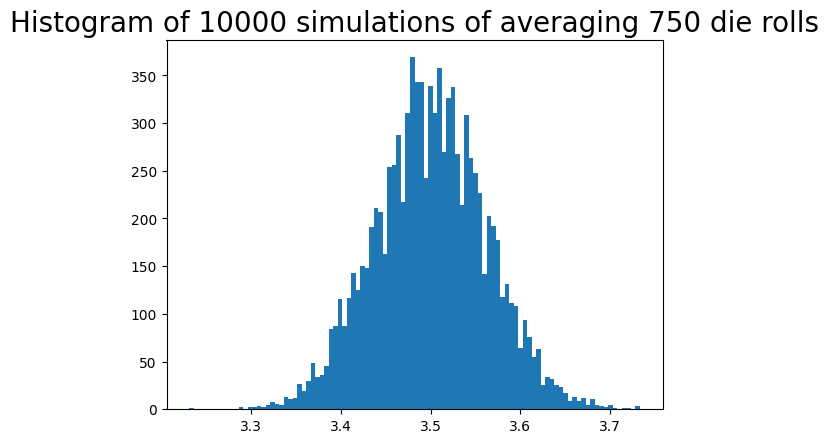

In [10]:
#Repeat the above simulation a large number of times.

N = 10000 #10000 total simulations 
M = 750 # 750 dice rolls per simulation

game_outcomes = [np.random.randint(low = 1, high = 7, size = M) for i in range(N)] # Create an array of random integers simulating dice rolls

average_outcomes = [np.mean(game_outcome) for game_outcome in game_outcomes]


import matplotlib.pyplot as plt

plt.hist(average_outcomes, bins = 100)
plt.title(f'Histogram of {N} simulations of averaging {M} die rolls', size = 20)

plt.show()

# **The 68-95-99.7 Rule**

If $\sigma$ is the sample standard deviation of an experiment with simulated value $E$ with true mean $\mu$, then there is approximately a $68\%$ chance that $|E-\mu|\leq \sigma$, approximately a $95\%$ that $|E-\mu|\leq 2\sigma$, and a $99.7\%$ chance that $|E-\mu|\leq 3\sigma$.

In [11]:
sigma = np.std(average_outcomes) #Find sample standard deviation
print(f'We expect approximately 68% of the experiments to be within {sigma} of the true expected value of 3.5.')
print('-----------')
print(f'We expect approximately 95% of the experiments to be within {2*sigma} of the true expected value of 3.5.')
print('-----------')
print(f'We expect approximately 99.7% of the experiments to be within {3*sigma} of the true expected value of 3.5.')
print('-----------')

We expect approximately 68% of the experiments to be within 0.06232170956662427 of the true expected value of 3.5.
-----------
We expect approximately 95% of the experiments to be within 0.12464341913324854 of the true expected value of 3.5.
-----------
We expect approximately 99.7% of the experiments to be within 0.1869651286998728 of the true expected value of 3.5.
-----------


In [12]:
import numpy as np


average_outcomes_one_std = [x for x in average_outcomes if np.abs(x - 3.5) <= sigma]
average_outcomes_two_std = [x for x in average_outcomes if np.abs(x - 3.5) <= 2 * sigma]
average_outcomes_three_std = [x for x in average_outcomes if np.abs(x - 3.5) <= 3 * sigma]

percent_one_std = len(average_outcomes_one_std)/N
percent_two_std = len(average_outcomes_two_std)/N
percent_three_std = len(average_outcomes_three_std)/N


print(f'{np.round(percent_one_std*100,2)}% of the experiments were within {sigma} of the true expected value of 3.5.')
print('-----------')
print(f'{np.round(percent_two_std*100,2)}% of the experiments were within {2*sigma} of the true expected value of 3.5.')
print('-----------')
print(f'{np.round(percent_three_std*100,2)}% of the experiments were within {3*sigma} of the true expected value of 3.5.')
print('-----------')

67.77% of the experiments were within 0.06232170956662427 of the true expected value of 3.5.
-----------
95.55% of the experiments were within 0.12464341913324854 of the true expected value of 3.5.
-----------
99.74% of the experiments were within 0.1869651286998728 of the true expected value of 3.5.
-----------


## Probabilistic Concepts in the Simple Dice Game

- The **sample space** of the simple dice game is the possible outcomes of playing the game, i.e. rolling a 1, 2, 3, 4, 5 or 6.

<br>

- The **probability distribution** of the simple dice game is an assignment of a probability to each outcome. The dice is fair, so each outcome has a probability of $1/6$.

<br>

- **Simulation** is used to estimate the expected value. Simulation techniques are the core of finding value to financial instruments and investment strategies.

<br>

- As we increse the number of simulations of the simple dice game, the average values seem to stabilize around a common value, namely the expected value. This phenomena is precisely the content of the **The Theorem of Large Numbers**.

<br>

- As we increase the number of simulations, the variance between simulated expected values and the true expected value decreases. This process aligns with the **Central Limit Theorem**, which states that the sample mean of a sufficiently large number of independent and identically distributed random variables will follow a normal distribution. This theorem is fundamental to quantitative finance, enabling us to apply **probabilisitic methodology** to value portfolios, determine fair stock option pricing, and perform risk assessment with confidence. We can then use **statistical methodology** to measure the confidence of our simulated measurements.

## More Monte-Carlo Simulations


**Estimating $\sqrt{2}$**

Consider the line segment joining the point $(0,0)$ and $(1,1)$. This line segment is of length $\sqrt{2}$ and the subline segment joining $(0,0)$ to $\left(\frac{\sqrt{2}}{{2}}, \frac{\sqrt{2}}{{2}}\right)$ has length $1$. Therefore the probability of randomly selectly a point on this line within the subline segment is $\frac{1}{\sqrt{2}} = \frac{\sqrt{2}}{2}$. Every point on the line segment is of the form $(x,x)$ with $0\leq x\leq 1$ and such a point lies within the subline segment of length $1$ if and only if $2x^2 \leq 1$. We therefore can estimate $\sqrt{2}$ by selecting $x$ from the unit interval $[0,1]$ with uniform distribution and measure the ratio of $x$-values with the property that $2x^2\leq 1$. Multiplying the result by $2$ yields an estimate for $\sqrt{2}$.  

In [13]:
N = 100000

X = np.random.uniform(0,1, size = N) # select N random values in the unit interval

Y = [x for x in X if 2*x**2<=1]# store random values that satisfy 2x^2<= 1

sqrt_2_estimate = 2*len(Y)/len(X)#Estimate sqrt 2 from the simulation

print(f"The squre root of 2 estimate using {N} random draws from the unit interval is {sqrt_2_estimate}.")

The squre root of 2 estimate using 100000 random draws from the unit interval is 1.41814.


In [14]:
#Compare simulated value with the actual value of \sqrt{2}.
np.sqrt(2)

np.float64(1.4142135623730951)

**Estimating Euler's constant**: Consider the uniform distribution on the unit interval $[0,1]$. 

What is the expected number of draws needed for the sum to exceed $1$?

Answer: $e\sim 2.71828$.

In [16]:
#Define a function that performs a simulation of 
#drawing numbers at random from the uniform distribution until the sum exceeds 1


#Return of the function is the number of draws needed.

N = 100000 #Number of simulations

def exceed_one():
    s = 0 # s will be the sum of random draws from unit interval
    n = 0 # n is the number of draws needed until the sum exceeds 1
    while s <= 1:
        x = np.random.uniform(0,1)
        n += 1
        s += x
    return n

X = [exceed_one() for _ in range(N)] # store number of draws needed over the N simulations


print(f"The average number of random draws from the unit interval needed for the sum to exceed 1 in {len(X)} trials is {np.mean(X)}.")

The average number of random draws from the unit interval needed for the sum to exceed 1 in 100000 trials is 2.71767.


## Some mathematics

With the right trick, it is not difficult to prove that the true expected value is Euler's constant $e$.

**Sketch of Proof**

Given a real number $x\geq 0$ let $f(x)$ be the expected number of draws from the unit interval so that the sum exceeds $x$. 

Given $x\in \mathbb{R}$, to compute the the probability $f(x)$ we consider the conditional relation that the expected number of random draws needed for the sum to exceed $x$ is $1$ more than average number of expected draws needed over the interval $(x-1,x]$. This is expressed as an equation

$$
f(x)= 1 + \int_{x-1}^{x} f(z)\,dz.
$$

If $z<0$ then $f(z)=0$. We therefore restrict our attention to $x$-values which lie in the unit interval $[0,1]$ so that

$$
f(x)= 1 + \int_{x-1}^{x} f(z)\,dz = 1 + \int_{0}^{x} f(z)\,dz.
$$

Taking derivatives of the furtherest-left and furtherest-right expressions in the equation, and applying the Fundamental Theorem of Calculus;

$$
f'(x) = f(x).
$$

We have an initial condition that $f(0)=1$. Therefore the solution function for $0\leq x\leq 1$ is $f(x)=e^x$. In particular, $f(1)=e$ is the expected number of draws needed from the unit interval with uniform distribution for the sum of the random variables to exceed $1$.

## Transitioning to methods in quantitative finance -- What to expect in these lectures

Monte-Carlo simulations play an important role in advanced techniques used to make meaningful predictions on future profits/losses, the value of a contract, the effect of dynamically hedging a portfolio, risk assessment, and much more. Central topics of these notebooks are to measure volatility and value at risk of a portfolio, create stock portfolio's with a predetermined risk acceptance, and to price European options using Monte-Carlo simulation. 
 
**Important Remark:** European options, which we will evaluate by simulating stock prices as geometric Brownian motions, have a closed form solution via the Black-Scholes-Merton equation and therefore, like the examples above, simulation is actually not needed as the exact value of a European contract can be found. However, there is value in simulating European options prices that go beyond estimating the output of an explicit function. Understanding how to accurately and efficiently simulate European option prices has the following benefits:

1) You build methodology that can be used to simulate more complex financial instruments (such as American, Asian, and Barrier options) which do not have a closed form solution as well as portfolio construction.

<br>

2) Modern simulation techniques used in more sophisticated models (such as the Heston model and its extensions) are built upon the methods in these notebooks.

<br>

3) Learning how to improve simulation accuracy, without the cost of increasing the sample size, through the use of **control variates** is deeply intertwined with the process of **dynamically hedging** a portfolio's value against risk of movement in the underlying assets, and for those interested, the mathematical proof techniques used in **theoretical financial mathematics**. 

<br>

4) Simulating leverage strategies can be utilized in investment strategies to create a portfolio with a predetermined risk profile and therefore to positively benefit a portfolio's **Sharpe Ratio**.